In [2]:
!pip install wget --user

In [3]:
import wget

link_to_data = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
ClevelandDataSet = wget.download(link_to_data)

print(ClevelandDataSet)

# get data

processed.cleveland (1).data


In [4]:
import pandas as pd
col_names = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

heart_data_df = pd.read_csv(ClevelandDataSet, sep=',', header=None, names=col_names, na_filter= True, na_values= {'ca': '?', 'thal': '?'})
heart_data_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
heart_data_df.shape # pandas DF L x B

(303, 14)

In [6]:
import xgboost as xgb

import pandas as pd

from sklearn import cross_validation
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
import pprint
%matplotlib inline

In [7]:
print("List of features with their corresponding count of null values : ")
print("---------------------------------------------------------------- ")
print(heart_data_df.isnull().sum())

List of features with their corresponding count of null values : 
---------------------------------------------------------------- 
age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
num        0
dtype: int64


In [8]:
heart_data_df = heart_data_df.dropna(how='any',axis=0) # drop the NA valued cells/columns so that you get a cleaner set

In [9]:
heart_data_df['diagnosed'] = heart_data_df['num'].map(lambda d: 1 if d > 0 else 0) # set target column
# to be derived form the num column...

    age - age in years 
    sex - sex(1 = male; 0 = female)
    cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
    ca - number of major vessels (0-3) colored by flourosopy
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

In [10]:
heart_data_df['diagnosed'] = heart_data_df['num'].map(lambda d: 1 if d > 0 else 0)

In [11]:
feature_cols = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
features_df = heart_data_df[feature_cols]
#features for training

In [12]:
heart_train, heart_test, target_train, target_test = cross_validation.train_test_split(features_df, heart_data_df.loc[:,'diagnosed'], test_size=0.33, random_state=0)
# split data

    DMatrix is the data interface provided by the XGBoost library. 
    The training data and test data are converted as DMatrix objects to perform training and to make predictions. 
    The DMatrix objects can be created from various data formats, such as Numpy arrays, Pandas data frames, or a Scipy sparse array

In [13]:
dm_train = xgb.DMatrix(heart_train, label=target_train)
dm_test = xgb.DMatrix(heart_test)

In [14]:
param = {'objective':'multi:softmax', 'max_depth':2, 'eta':0.8, 'num_class': 2, 'eval_metric': 'auc', 'silent':1 }
#set parameters

In [15]:
xgb_model = xgb.train(param, dm_train)
# the model.. lo behold... 

In [16]:
y_predict = xgb_model.predict(dm_test)
print(y_predict)

# prediction basedon the model..

[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1.]


In [17]:
accuracy = accuracy_score(target_test, y_predict)
print("Accuracy: " +  str(accuracy))

Accuracy: 0.8181818181818182


In [18]:
# insert obama not bad meme...

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

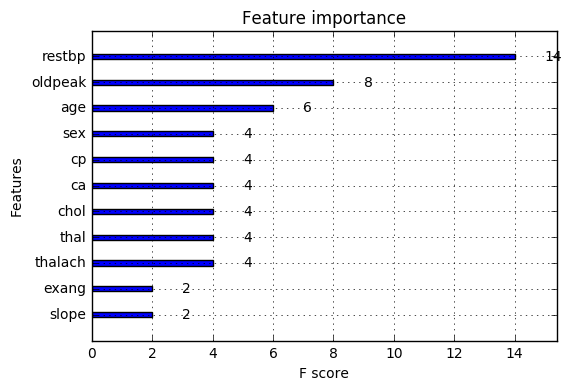

In [20]:
xgb.plot_importance(xgb_model)

In [21]:
# the feature importance.. in terms of affecting the outcome.

In [22]:
!pip install graphviz

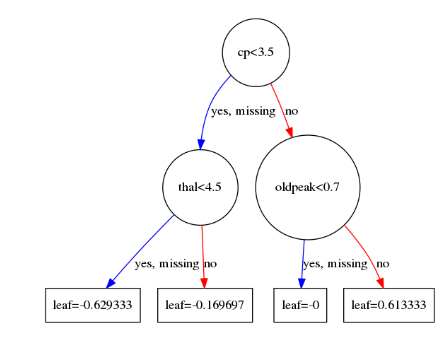

In [23]:
xgb.plot_tree(xgb_model, num_trees=1)

In [24]:
from repository.mlrepository import MetaNames
from repository.mlrepository import MetaProps
from repository.mlrepositoryclient import MLRepositoryClient
from repository.mlrepositoryartifact import MLRepositoryArtifact

# model persistance using watson ml learning repo..

In [26]:
# model persistance using watson ml learning repo..
# The Machine Learning service is a set of REST APIs that you can call from any programming language to develop applications
# common repo.. so dump your model there.. and host it as ain API.. thats the basic idea..
# set it up and get credentials..

wml_credentials =  {
  "url": "https://ibm-watson-ml.mybluemix.net",
  "access_key": "/iAwsOArQjd2fO2bOcg0B/kzUNPYSP1eRR6ZIabdW9GVSMYz/VdffFaUCcMgMUSfHxGxQ3pIogjgEOjN0TGDTcL0h32gVzPkwMbmHXNpi+FQYUqQmv73SQJrb1WXWeZv",
  "username": "818bea55-efd6-417f-baa0-db88935b7dff",
  "password": "556e6e2c-7026-4c72-b5c2-b2dd7d55e1a9",
  "instance_id": "c518be29-6eda-43bb-9f34-fcfc84f7f8b7"
}

In [27]:
ml_repository_client = MLRepositoryClient(wml_credentials['url'])
ml_repository_client.authorize(wml_credentials['username'], wml_credentials['password'])

#Connect to ...

In [28]:
#create a model artefact and save it to the ML repo...
# Check if props is mandatory
props1 = MetaProps({MetaNames.AUTHOR_NAME:"YOUR_name", MetaNames.AUTHOR_EMAIL:"Your_email@email.com"})

model_artifact = MLRepositoryArtifact(xgb_model, name='XGB_Heart_Disease_Detection', meta_props=props1)

saved_model = ml_repository_client.models.save(model_artifact) # a callable handle.. to be used in this book

In [29]:
saved_model_meta = saved_model.meta.get()
pprint.pprint(saved_model_meta)

{'authorEmail': 'Your_email@email.com',
 'authorName': 'YOUR_name',
 'creationTime': datetime.datetime(2018, 1, 24, 5, 38, 56, 453000, tzinfo=tzutc()),
 'lastUpdated': datetime.datetime(2018, 1, 24, 5, 38, 56, 547000, tzinfo=tzutc()),
 'modelType': 'xgboost-model-0.6',
 'modelVersionHref': 'https://ibm-watson-ml.mybluemix.net/v2/artifacts/models/cabb7107-5af9-4c89-a63b-b060d027bea4/versions/586dfc6e-71fa-4bbb-8f94-b14cc78386af',
 'pipelineVersionHref': None,
 'runtime': 'python-3.5',
 'trainingDataRef': {},
 'version': '586dfc6e-71fa-4bbb-8f94-b14cc78386af'}


In [30]:
# loading the XGbooster from the said repo..
saved_model_meta['modelVersionHref']

'https://ibm-watson-ml.mybluemix.net/v2/artifacts/models/cabb7107-5af9-4c89-a63b-b060d027bea4/versions/586dfc6e-71fa-4bbb-8f94-b14cc78386af'

In [31]:
loaded_artifact = ml_repository_client.models.version_from_href(saved_model_meta['modelVersionHref'])
loaded_xgb_model = loaded_artifact.model_instance()
print("Type of model: " + str(type(loaded_xgb_model)))

Type of model: <class 'xgboost.core.Booster'>


In [32]:
y_lpredict = loaded_xgb_model.predict(dm_test)
print(y_lpredict)
#predict using the model posted at the said repo..

[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1.]


In [33]:
loaded_artifact = ml_repository_client.models.version_from_href(saved_model_meta['modelVersionHref'])
loaded_xgb_regressor = loaded_artifact.model_instance(as_type="XGBRegressor")

#WML repo Python client provides an option to load the XGBoost model i.e Booster as a Scikit-Learn wrapper - XGBRegressor.. 

In [34]:
loaded_artifact = ml_repository_client.models.version_from_href(saved_model_meta['modelVersionHref'])
loaded_xgb_regressor = loaded_artifact.model_instance(as_type="XGBRegressor")
# you can then use the sci kit learn's other api stuff on the said model..

In [56]:
(saved_model.guid)

AttributeError: 'ScikitModelArtifact' object has no attribute 'guid'

In [35]:
print("Type of model: " + str(type(loaded_xgb_regressor)))

Type of model: <class 'xgboost.sklearn.XGBRegressor'>


In [36]:
y_pred_xgb_reg = loaded_xgb_regressor.predict(heart_test)
print(y_pred_xgb_reg)

[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1.]


In [37]:
# same resutls.. but differet type of object/model used in the DSX book

    The cells below lay out the steps for deploying the model on cloud.. 
    The last cell actually calls out and gets the response for a single  row of input data
    The cells before that enable the hosting/accessing of the model built in the previous cells
    

In [39]:
import urllib3, requests, json

headers = urllib3.util.make_headers(basic_auth='{}:{}'.format(wml_credentials['username'], wml_credentials['password']))
url = '{}/v3/identity/token'.format(wml_credentials['url'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

#Fetch ML access token


In [40]:
# getting published models URL instance details

endpoint_instance = wml_credentials['url'] + "/v3/wml_instances/" + wml_credentials['instance_id']
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken} 

response_get_instance = requests.get(endpoint_instance, headers=header)
print(response_get_instance)
print(response_get_instance.text)

<Response [200]>
{"metadata":{"guid":"c518be29-6eda-43bb-9f34-fcfc84f7f8b7","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7","created_at":"2018-01-24T05:28:02.092Z","modified_at":"2018-01-24T05:38:56.787Z"},"entity":{"source":"Bluemix","published_models":{"url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models"},"usage":{"expiration_date":"2018-02-01T00:00:00.000Z","computation_time":{"limit":18000,"current":0},"model_count":{"limit":200,"current":1},"prediction_count":{"limit":5000,"current":0},"deployment_count":{"limit":5,"current":0}},"plan_id":"3f6acf43-ede8-413a-ac69-f8af3bb0cbfe","status":"Active","organization_guid":"d076470d-971e-4701-80b6-1aa4ea364331","region":"us-south","account":{"id":"500607475","name":"rony roy's Account","type":"TRIAL"},"owner":{"ibm_id":"3100009M1Q","email":"ronyroy2@in.ibm.com","user_id":"66bb61d1-a79d-4c09-aa47-ef3f37592661","country_code":"IND"

In [41]:
endpoint_published_models = json.loads(response_get_instance.text).get('entity').get('published_models').get('url')
print(endpoint_published_models)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models


In [42]:
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

response_get = requests.get(endpoint_published_models, headers=header)
print(response_get)
print(response_get.text)

<Response [200]>
{"count":1,"resources":[{"metadata":{"guid":"cabb7107-5af9-4c89-a63b-b060d027bea4","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5af9-4c89-a63b-b060d027bea4","created_at":"2018-01-24T05:38:56.453Z","modified_at":"2018-01-24T05:38:56.547Z"},"entity":{"runtime_environment":"python-3.5","learning_configuration_url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5af9-4c89-a63b-b060d027bea4/learning_configuration","author":{"name":"YOUR_name","email":"Your_email@email.com"},"name":"XGB_Heart_Disease_Detection","learning_iterations_url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5af9-4c89-a63b-b060d027bea4/learning_iterations","feedback_url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5

In [57]:
[endpoint_deployments] = [x.get('entity').get('deployments').get('url') for x in json.loads(response_get.text).get('resources') if x.get('metadata').get('guid') == saved_model.uid]
print(saved_model.uid)
print(endpoint_deployments)

cabb7107-5af9-4c89-a63b-b060d027bea4
https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5af9-4c89-a63b-b060d027bea4/deployments


In [44]:
# can now create online deployment for the published model
payload_online = {"name": "xgb_heart_disease_v1", "description": "xgb_heart_disease", "type": "online"}
response_online = requests.post(endpoint_deployments, json=payload_online, headers=header)

print(response_online.text)

{"metadata":{"guid":"601ea1d3-a23e-4b8f-a1a6-05eeb38b1182","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5af9-4c89-a63b-b060d027bea4/deployments/601ea1d3-a23e-4b8f-a1a6-05eeb38b1182","created_at":"2018-01-24T05:47:56.455Z","modified_at":"2018-01-24T05:47:56.928Z"},"entity":{"runtime_environment":"python-3.5","name":"xgb_heart_disease_v1","scoring_url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5af9-4c89-a63b-b060d027bea4/deployments/601ea1d3-a23e-4b8f-a1a6-05eeb38b1182/online","description":"xgb_heart_disease","published_model":{"author":{"name":"YOUR_name","email":"Your_email@email.com"},"name":"XGB_Heart_Disease_Detection","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5af9-4c89-a63b-b060d027bea4","guid":"cabb7107-5af9-4c89-a63b-b060d027bea4","created_at":"2018

In [45]:
scoring_url = json.loads(response_online.text).get('entity').get('scoring_url')
print(scoring_url)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/c518be29-6eda-43bb-9f34-fcfc84f7f8b7/published_models/cabb7107-5af9-4c89-a63b-b060d027bea4/deployments/601ea1d3-a23e-4b8f-a1a6-05eeb38b1182/online


In [46]:
payload_scoring = {
   "values": [[64.0, 1.0, 4.0, 328.0, 263.0, 0.0, 0.0, 105.0, 1.0, 0.2, 2.0, 1.0, 7.0]]
}

response_scoring = requests.post(scoring_url, json=payload_scoring, headers=header)
pprint.pprint(response_scoring.text)

'{"fields":["prediction","probability"],"values":[[1.0,[-1.467953085899353,2.4679532051086426]]]}'
